In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Reading in all data of use
train_data = pd.read_csv('peter_data/train.csv')

In [3]:
train_data.sort_values(by='GrLivArea',ascending=False)[:2]

train_data = train_data.drop(train_data[train_data['Id']==1299].index)
train_data = train_data.drop(train_data[train_data['Id']==524].index)

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


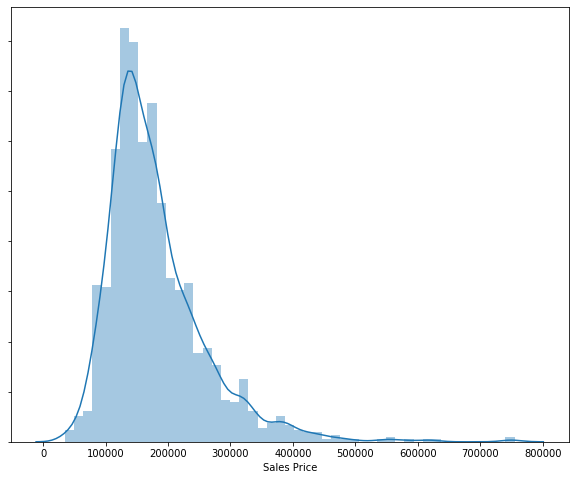

In [4]:
print(train_data['SalePrice'].describe())

#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sns.distplot(train_data['SalePrice'], ax=ax1).set(xlabel='Sales Price',yticklabels=[]);

In [5]:
train_data['SalePrice'] = np.log1p(train_data['SalePrice'])

count    1458.000000
mean       12.024015
std         0.399713
min        10.460271
25%        11.774720
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64


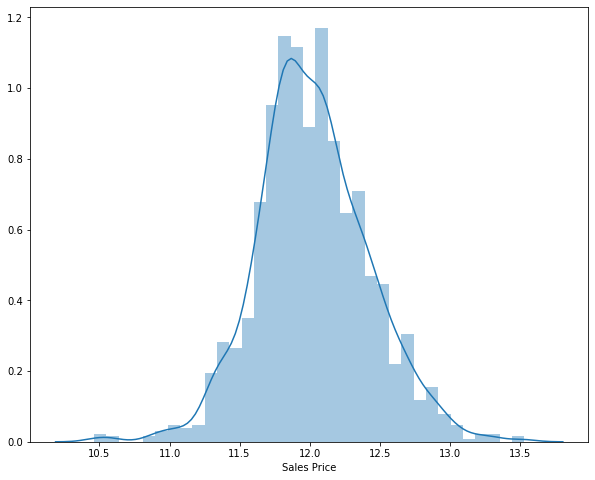

In [6]:
print(train_data['SalePrice'].describe())

#Graphed test sales prices to check and see if there is a normal distribution. The distribution seems to be skewed to the left
# and will need to be either normalized or standardized
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
sns.distplot(train_data['SalePrice'], ax=ax1).set(xlabel='Sales Price');

In [7]:
train_data.loc[:, "MasVnrArea"] = train_data.loc[:, "MasVnrArea"].fillna(train_data["MasVnrArea"].mean())
train_data.loc[:, "MasVnrType"] = train_data.loc[:, "MasVnrType"].fillna(0)
train_data.loc[:, "BsmtFinType1"] = train_data.loc[:, "BsmtFinType1"].fillna(0)
train_data.loc[:, "BsmtQual"] = train_data.loc[:, "BsmtQual"].fillna(0)
train_data.loc[:, "BsmtCond"] = train_data.loc[:, "BsmtCond"].fillna(0)
train_data.loc[:, "BsmtExposure"] = train_data.loc[:, "BsmtExposure"].fillna(0)
train_data.loc[:, "BsmtFinType2"] = train_data.loc[:, "BsmtFinType2"].fillna(0)
train_data.loc[:, "GarageQual"] = train_data.loc[:, "GarageQual"].fillna(0)
train_data.loc[:, "GarageCond"] = train_data.loc[:, "GarageCond"].fillna("0")
train_data.loc[:, "GarageFinish"] = train_data.loc[:, "GarageFinish"].fillna(0)
train_data.loc[:, "GarageType"] = train_data.loc[:, "GarageFinish"].fillna(0)

train_data.loc[:, "GarageYrBlt"] = train_data.loc[:, "GarageYrBlt"].fillna(train_data["GarageYrBlt"].median())

train_data.loc[:, "LotFrontage"] = train_data.loc[:, "LotFrontage"].fillna(train_data["LotFrontage"].mean())

train_data.loc[:, "FireplaceQu"] = train_data.loc[:, "FireplaceQu"].fillna(0)
train_data.loc[:, "Fence"] = train_data.loc[:, "Fence"].fillna(0)
train_data.loc[:, "Alley"] = train_data.loc[:, "Alley"].fillna(0)
train_data.loc[:, "MiscFeature"] = train_data.loc[:, "MiscFeature"].fillna(0)
train_data.loc[:, "Electrical"] = train_data.loc[:, "Electrical"].fillna("SBrkr")
train_data.loc[:, "PoolQC"] = train_data.loc[:, "PoolQC"].fillna(0)

In [8]:
train_data = train_data.replace({
    "ExterQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "BsmtQual": {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5 },
    "KitchenQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4 },
    "GarageFinish": {"None": 0, "Unf": 1, "RFn": 2, "Fin":3}
     })

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_train_df = train_data.select_dtypes(include=numerics)

numeric_train_df = numeric_train_df.drop(["Id"], axis=1)

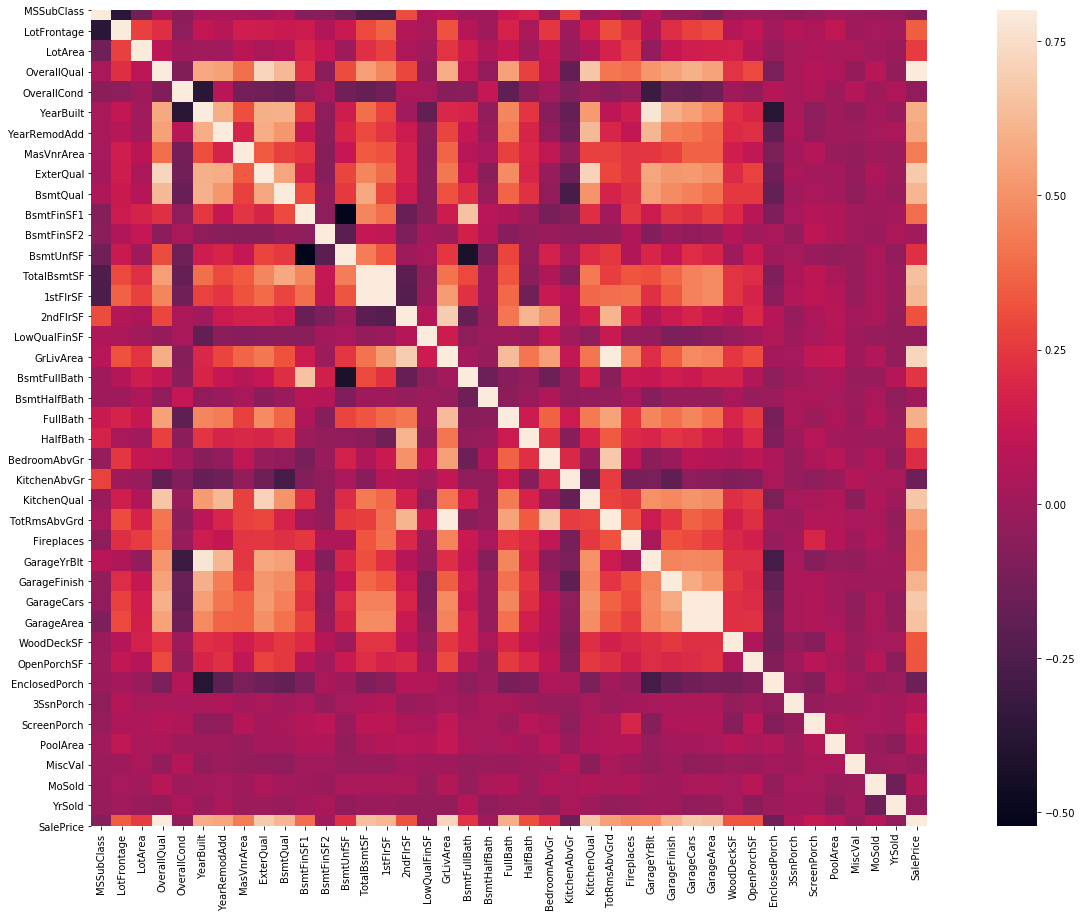

In [10]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

In [11]:
from scipy import stats
outliers = numeric_train_df.drop(['SalePrice'], axis = 1)
numeric_train_df = numeric_train_df[(np.abs(stats.zscore(outliers)) < 3).all(axis=1)]

In [12]:
numeric_train_df = numeric_train_df.drop(['KitchenAbvGr',"BsmtHalfBath","PoolArea"], axis =1)

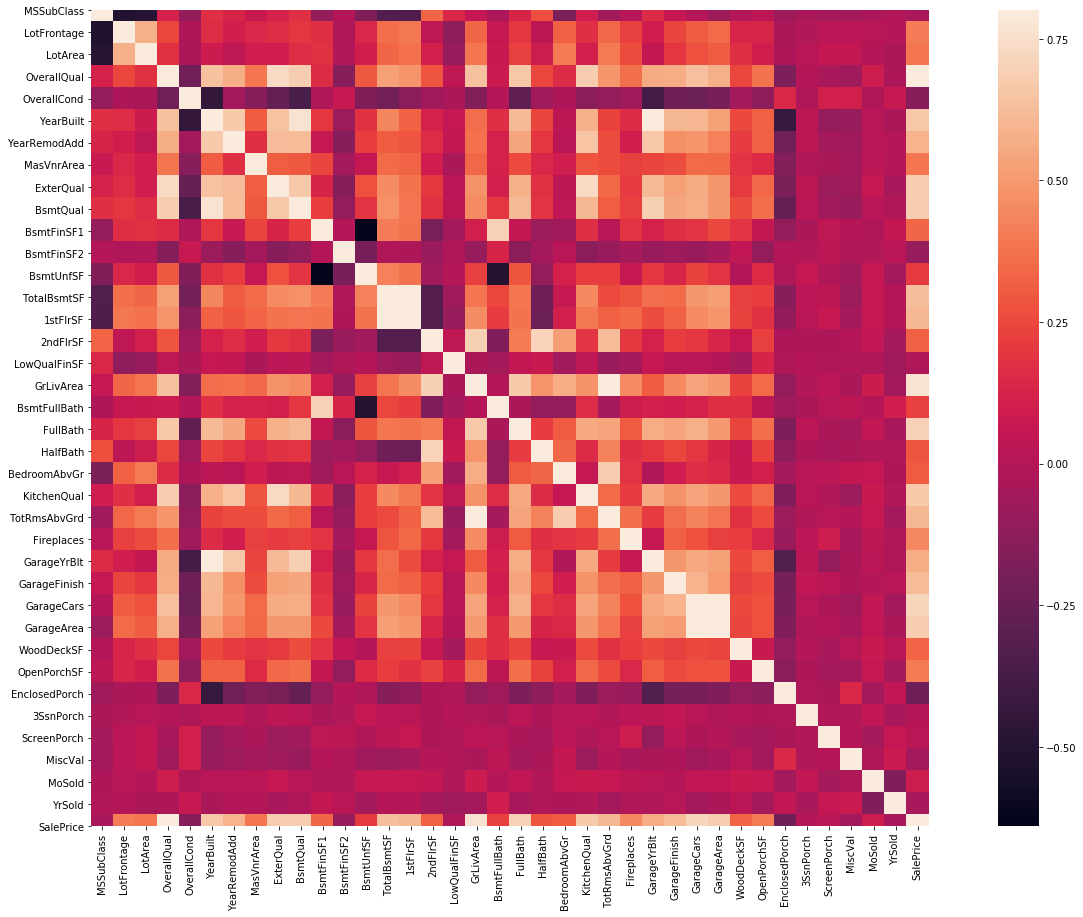

In [13]:
corrmat = numeric_train_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

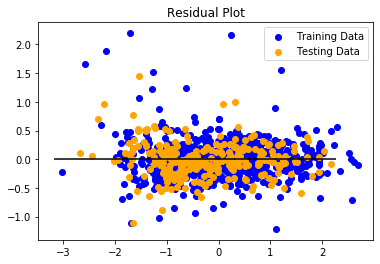

MSE: 0.09654617612193025, R2: 0.9108347773829695

0.8999498770494964
0.9108347773829695


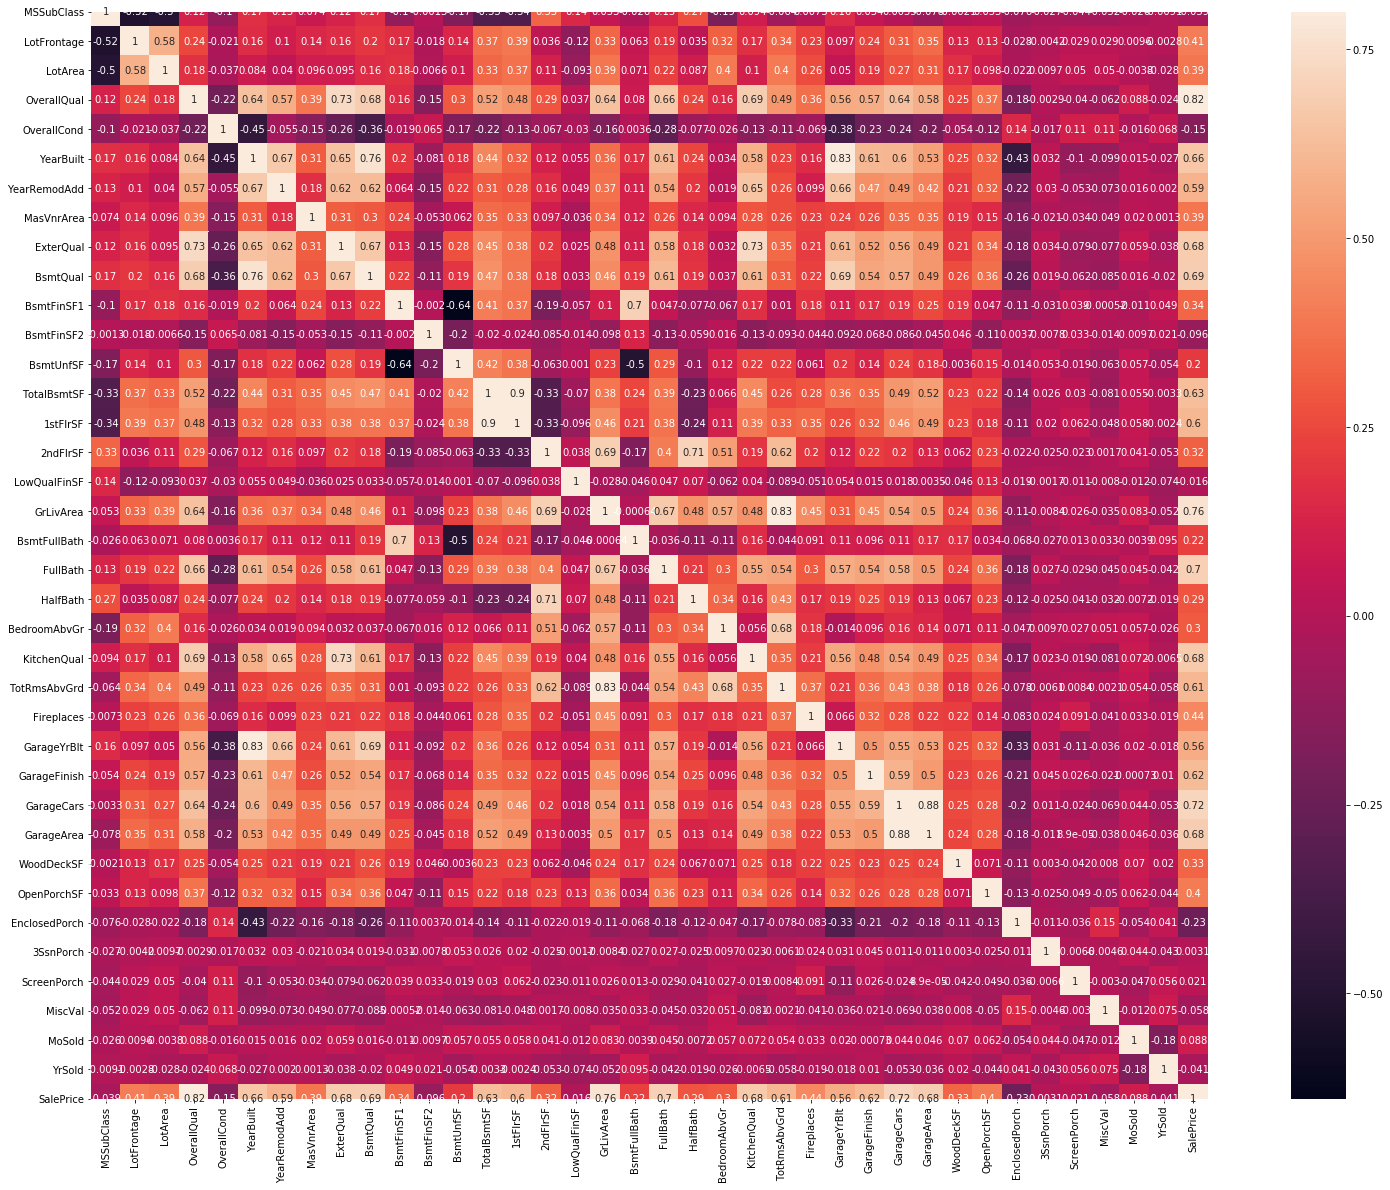

In [14]:
from sklearn.model_selection import train_test_split
X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

heat = pd.concat([X, y], axis=1, sort=False)
corrmat = heat.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [15]:
numeric_train_df.corr()['SalePrice'].sort_values(ascending=False)[1:10]

OverallQual    0.817030
GrLivArea      0.761571
GarageCars     0.716037
FullBath       0.698386
BsmtQual       0.686882
GarageArea     0.683859
ExterQual      0.680275
KitchenQual    0.675950
YearBuilt      0.663590
Name: SalePrice, dtype: float64

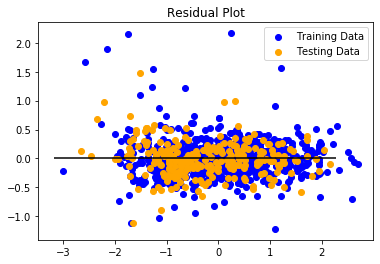

MSE: 0.09446364816511303, R2: 0.9127580961132865

0.8995727811388458
0.9127580961132865


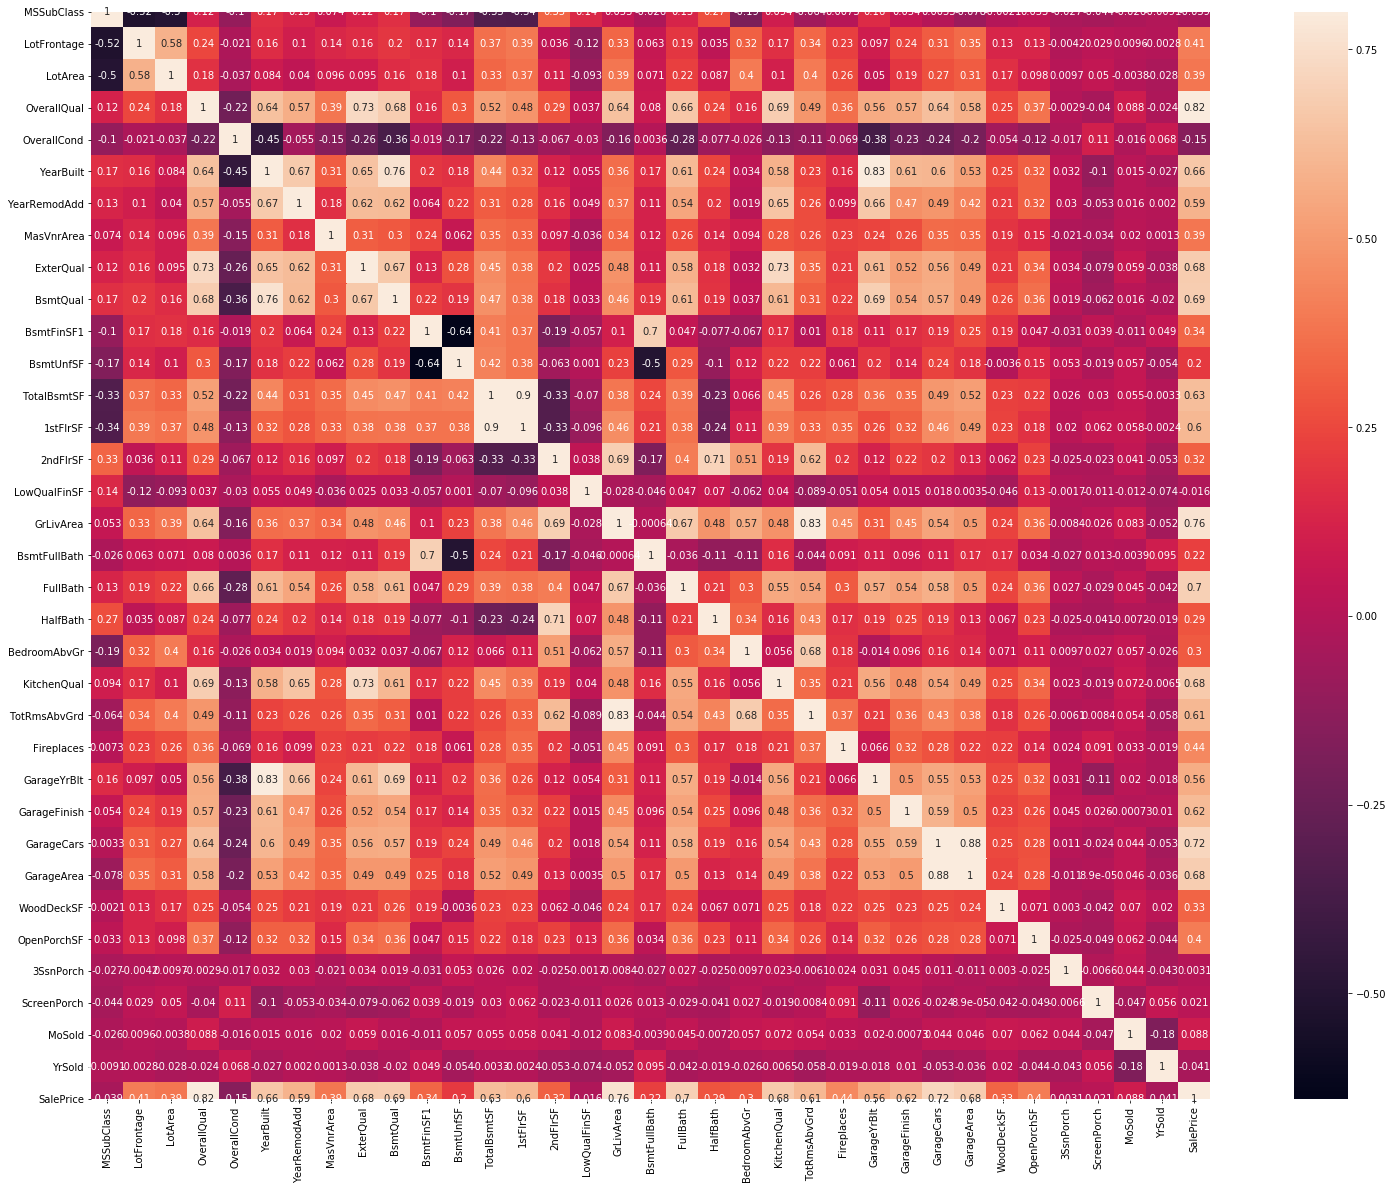

In [16]:
numeric_train_df = numeric_train_df.drop(['EnclosedPorch','MiscVal','BsmtFinSF2'], axis =1)   


X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

heat = pd.concat([X, y], axis=1, sort=False)
corrmat = heat.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

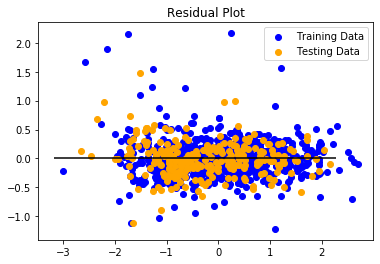

MSE: 0.09446364816511292, R2: 0.9127580961132866

0.8995727811388458
0.9127580961132866


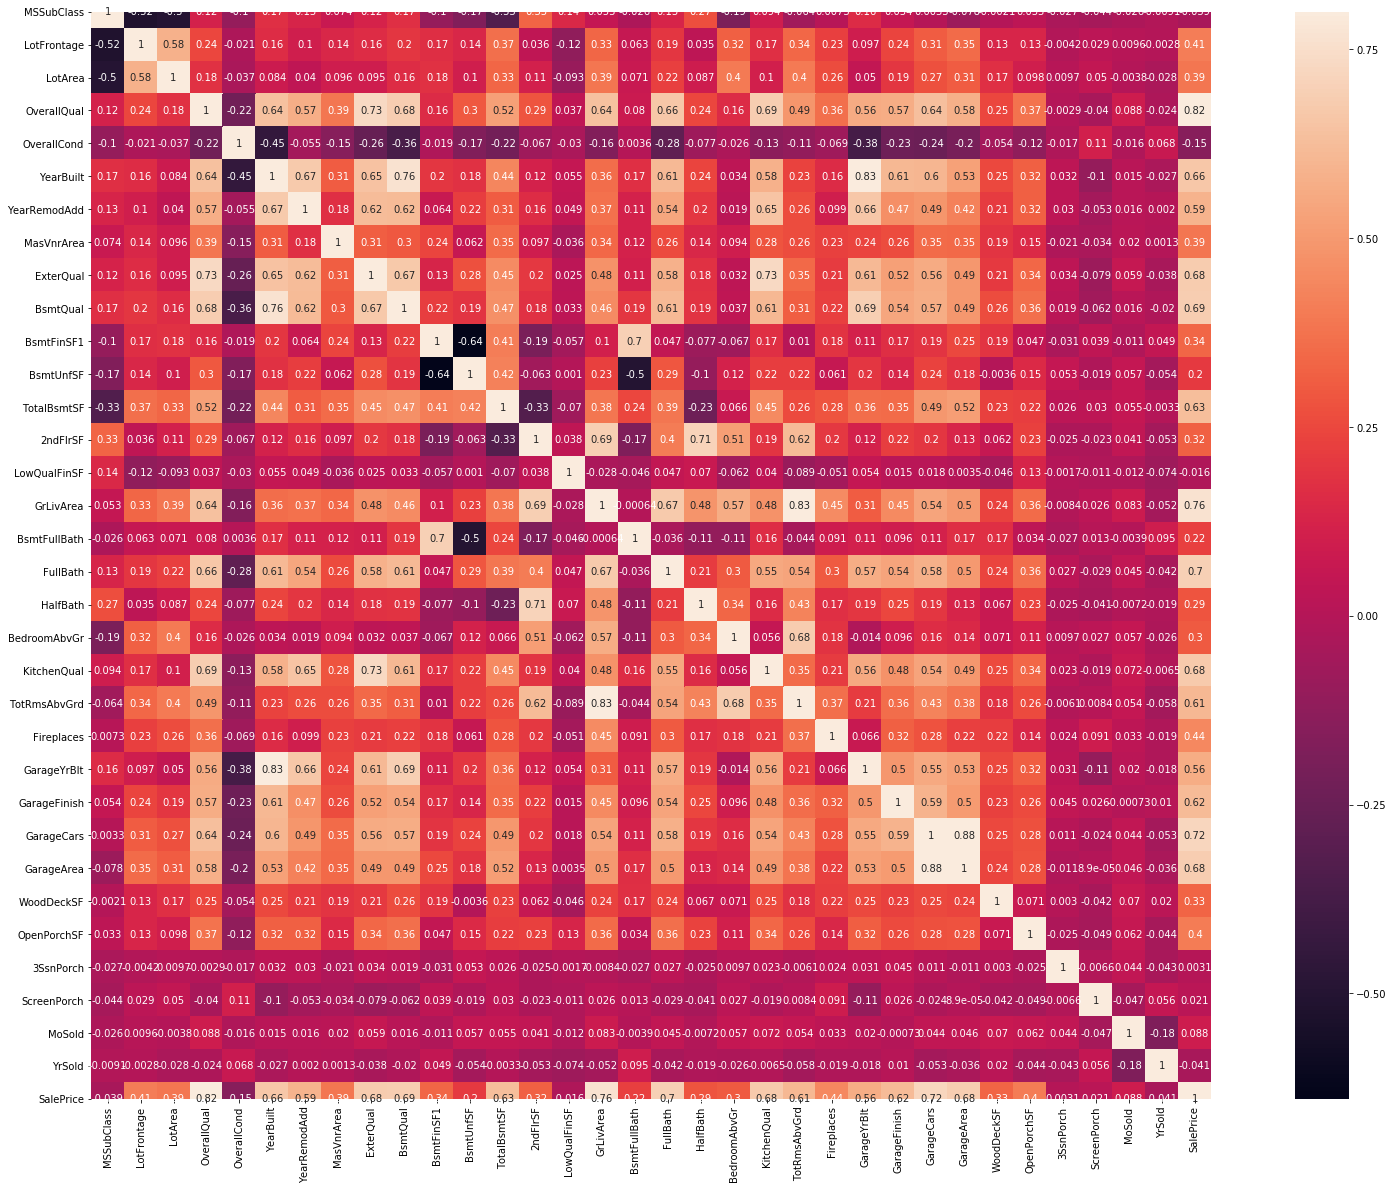

In [17]:
numeric_train_df = numeric_train_df.drop(['1stFlrSF'], axis =1)   


X = numeric_train_df.drop(["SalePrice"], axis =1)
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

heat = pd.concat([X, y], axis=1, sort=False)
corrmat = heat.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);

In [18]:
y = numeric_train_df["SalePrice"]

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
# X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=5, cv=2)
selector = selector.fit(X, y)
selector.support_

array([False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False,  True])

In [19]:
selector.ranking_

array([5, 2, 5, 1, 1, 3, 4, 3, 1, 1, 4, 4, 4, 5, 2, 5, 1, 1, 1, 1, 1, 1,
       1, 3, 2, 1, 4, 5, 3, 2, 3, 2, 1])

In [20]:
selector.n_features_

13

In [21]:
selector.get_support(indices=True)

array([ 3,  4,  8,  9, 16, 17, 18, 19, 20, 21, 22, 25, 32], dtype=int64)

In [22]:
pd.set_option('display.max_columns', None)
X.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,3,4,706,150,856,854,0,1710,1,2,1,3,3,8,0,2003.0,2,2,548,0,61,0,0,2,2008
2,60,68.0,11250,7,5,2001,2002,162.0,3,4,486,434,920,866,0,1786,1,2,1,3,3,6,1,2001.0,2,2,608,0,42,0,0,9,2008
4,60,84.0,14260,8,5,2000,2000,350.0,3,4,655,490,1145,1053,0,2198,1,2,1,4,3,9,1,2000.0,2,3,836,192,84,0,0,12,2008


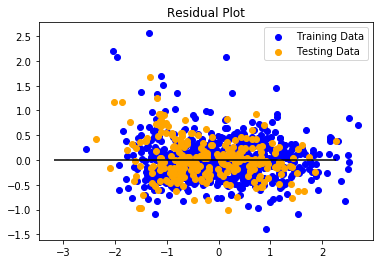

MSE: 0.16731162086763174, R2: 0.845479349671624

0.8402047178470393
0.845479349671624


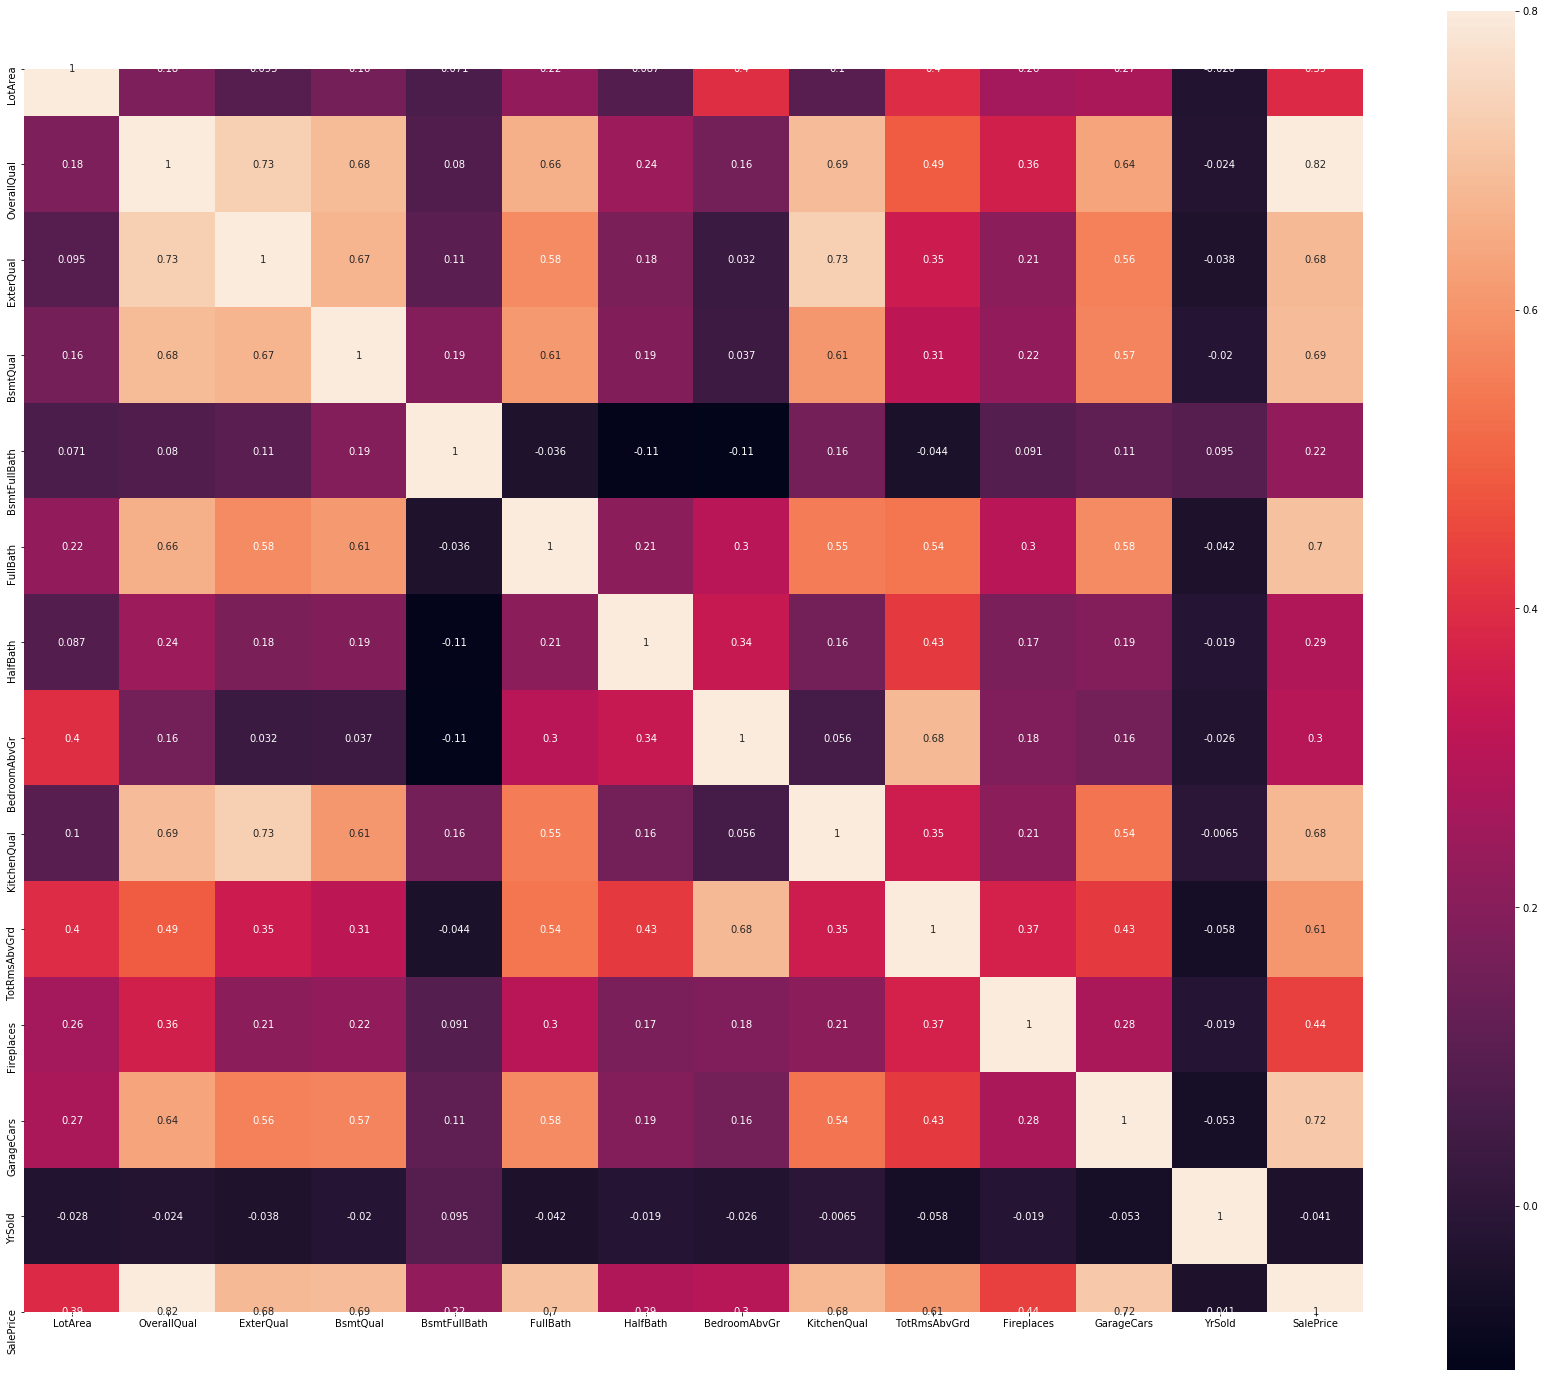

In [23]:
X = numeric_train_df.drop(["SalePrice"], axis =1)
X = X.filter(items=['LotArea','OverallQual','ExterQual',
                        'BsmtQual','BsmtFullBath','FullBath','HalfBath',
                        'BedroomAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
                        'GarageCars','YrSold'])
y = numeric_train_df["SalePrice"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
print()

print(model.score(X_train_scaled,y_train_scaled))

print(model.score(X_test_scaled,y_test_scaled))

heat = pd.concat([X, y], axis=1, sort=False)
corrmat = heat.corr()
f, ax = plt.subplots(figsize=(30, 25))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True);